# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

#Plan de Análisis 

Objetivo: Determinar que plan Surf o Ultimate genera más ingresos. 

1. Cargar las librerías

2. Revisión de formato de las tablas. .head() puede bastar. 

3. Revisión de duplicados, tipos de datos. Emplear .info() y conversión de datos conforme sea requerido. 

4. Realizar manipulación de datos y pruebas estadísticas pertinentes. pandas y numpy.  

5. Visualizaciones conforme correspondan. matplotlib y seaborn. 

## Inicialización

In [156]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial 
import numpy as np 
from scipy import stats as st #distribuciones
import math as mt
import matplotlib.ticker as ticker
from functools import reduce
import seaborn as sns

## Cargar datos

In [157]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv("megaline_users.csv")
plans = pd.read_csv("megaline_plans.csv")
messages = pd.read_csv("megaline_messages.csv")
internet = pd.read_csv("megaline_internet.csv")
calls = pd.read_csv("megaline_calls.csv")

#llamada general de head para observar el formato de cada dataframe
print(users.head())
print(plans.head())
print(messages.head())
print(internet.head())
print(calls.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20       

La importación de los datos generó un formato homogéneo y adecuado. 

## Preparar los datos

## Tarifas

In [158]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


2 registros conforme a los 2 planes que se tienen. Todos los valores están en el tipo de datos apropiado y sin valores ausentes. 

In [159]:
# Imprime una muestra de los datos para las tarifas
print(plans)



   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Al ser un marco de datos limitado se opta por imprimirlo completo en lugar de una muestra del mismo. 

## Corregir datos

Sin correcciones necesarias para el marco de datos de las tarifas: "plans"

## Enriquecer los datos

Posibles enriquecimientos: Umbral de preferencia. 

Calcular cuanto gasto es necesario para requerir un plan ultimate. Ultimate parece estar orientado a grandes consumidores. ¿Cuántos de estos hay en la muestra? ¿Desquitan el plan? 

Se cumplirá con el enriquecimiento posterior a análisis más generales de las muestras. 

## Usuarios/as

In [160]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()
users.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

8 Columnas: ['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan','churn_date'], 500 registros. 

Los valores se encuentran en el tipo de datos correcto. Se puede revisar reg_date para corroborar si es el tipo de dato correcto o si puede ser cambiado a dato de tiempo (dt). Revisando una muestra de los datos y por inferencia se denota que la columna reg_date corresponde a la fecha de registro y por lo tanto sería aconsejable cambiarla a valores de tiempo dt. 

No hay valores nulos salvo para la columna "churn_date" que tiene 466 datos nulos. Con conocimiento dominio la columna corresponde a día de abandono del plan en el cual el que haya valor evidencia cuantos clientes y en que día abandonaron el plan. Es buena noticia que de la muestra de 500 clientes 466 estén en el plan y solo haya un 6.8% de tasa de abandono o 34 clientes perdidos. 

In [161]:
# Imprime una muestra de datos para usuarios
print(users.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


Acciones correctivas: 

1. Cambiar los datos de la columna reg_date y churn_date a dt. 

### Corregir los datos

In [162]:
users["reg_date"] = pd.to_datetime(users["reg_date"], format = "%Y-%m-%d")
print(users["reg_date"].head())
users["churn_date"] = pd.to_datetime(users["churn_date"], format = "%Y-%m-%d") 



0   2018-12-24
1   2018-08-13
2   2018-10-21
3   2018-01-28
4   2018-05-23
Name: reg_date, dtype: datetime64[ns]


### Enriquecer los datos

Posibles enriquecimientos: 

1. Cantidad de usuarios por plan.

2. Distribución de cantidad de usuarios por ciudad. 

3. Conteo por edad. 

4. Conteo por registro. 

5. Estadísticas descriptivas dado que se van de la empresa. Edad, ciudad, registro, plan al que pertenecen. 

In [163]:
#'user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan','churn_date'
#Usuarios por plan
usuarios_por_plan = users[["user_id", "plan"]].groupby("plan")["user_id"].size()
print("Usuarios por plan:", usuarios_por_plan) #339 y 161 para surf y ultimate respectivamente. 

distrib_usuarios_ciudad = users.groupby(["user_id", "city"])["user_id"].value_counts
distrib_usuarios_edad = users.groupby(["user_id", "age"])["user_id"].value_counts
distrib_usarios_reg_date = users.groupby(["user_id", "reg_date"])["user_id"].value_counts #considerar hacer rangos de tiempo? 
distrib_usuarios_churned = users[users["churn_date"].notna()]

print(distrib_usuarios_churned) #Datos correctamente filtrados
distrib_usuarios_churned.info() #34 con información confirmados

#Estadística descriptiva de usuarios que se retiran 
churned_mean_age = distrib_usuarios_churned["age"].mean()
churned_median_age = distrib_usuarios_churned["age"].median()
churned_ciudad = distrib_usuarios_churned["city"].value_counts()
churned_plan = distrib_usuarios_churned["plan"].value_counts()
churned_reg_date = distrib_usuarios_churned["reg_date"].value_counts().sort_index()
churned_reg_date_moda = distrib_usuarios_churned["reg_date"].dt.month.mode()

print(f"Promedio de edad de clientes perdidos: {churned_mean_age}") #45.6 años
print(f"Mediana de edad de clientes perdidos: {churned_median_age}") #46 años
print(f"Ciudades de clientes perdidos: {churned_ciudad}") #New York
print(f"Conteo de planes de clientes perdidos: {churned_plan}") #23 surf, 11 ultimate. 
print(f"Fechas de registro de clientes perdidos: {churned_reg_date}")
print(f"Moda de fecha de registro de clientes perdidos {churned_reg_date_moda}") #Abril es el mes en el que más se salen, interesante revisar rangos. 


Usuarios por plan: plan
surf        339
ultimate    161
Name: user_id, dtype: int64
     user_id  first_name  last_name  age  \
6       1006      Jesusa   Bradford   73   
12      1012     Jonelle    Mcbride   59   
22      1022          Bo       Snow   73   
40      1040       Paris     Santos   72   
50      1050        Jone       Owen   23   
54      1054       Denis      Frost   50   
67      1067        Robt      Allen   37   
83      1083      Lyndia    Acevedo   65   
84      1084       Wiley   Mckinney   21   
94      1094      Walter   Petersen   54   
106     1106        Eddy   Garrison   47   
129     1129       Marin     Bolton   70   
172     1172      Weldon   Robinson   72   
180     1180       Wonda       Hays   24   
186     1186      Josiah    Douglas   55   
191     1191        Zack     Waters   75   
220     1220        Jack     Strong   26   
246     1246      Stevie      Moran   69   
269     1269      Irving   Thompson   39   
281     1281        Zack      Hardy 

## Llamadas

In [164]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()
calls.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')

4 columnas: ['id', 'user_id', 'call_date', 'duration'], 137735 registros.

No hay valores nulos. 

Tipo de dato de la columna call_date es objeto o cadena mientras que debería ser variable de tiempo o fechas. 

El ID se puede revisar si se prefiere como enteros o cadenas, en usuarios se tiene como enteros. Se puede revisar presencia de alphanuméricos y si no están presentes considerar pasar a entero para mantener homogeneidad entre los tipos de variables en los marcos de datos. 

In [165]:
# Imprime una muestra de datos para las llamadas
print(calls.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


Acciones correctivas: 

1. Pasar call date a tipo de dato de fechas o dt. 

Opcional: Revisar columna de ID para alphanuméricos o cambio a tipo de dato entero. Meramente tiene guiones bajo y números lo cual lo vuelve objeto y no entero. 

### Corregir los datos

In [166]:
#Revisión de columna ID (opcional-omitido)

#Cambio de call_date a tipo de dato dt. 
calls["call_date"] = pd.to_datetime(calls["call_date"], format= "%Y-%m-%d")


### Enriquecer los datos

Nota personal: El marco de datos de llamadas tiene conexión mediante user_id y id con los demás marcos de datos. Carece de nombres para los usuarios. 


Posibles enriquecimientos: 

Medidas de tendencia central. LLamadas por usuario.

Conteo de llamadas a través de los meses. 
Tendencia central. Mediana y promedio. 


Duración promedio de llamadas en minutos: 7.146672958942897
Duración mediana de llamadas en minutos: 6.0
Minutos estimados de llamadas en los ultimos meses donde más se hacen llamadas: 262.6067375886525
Costo adicional promedio por usuario debido a llamadas por mes en los meses de más consumo (10 a 12): 7.878202127659574 dólares
user_id
1000     16
1001    261
1002    113
1003    149
1004    370
       ... 
1495    253
1496    195
1497     54
1498    451
1499    204
Name: user_id, Length: 481, dtype: int64
user_id
164    7
216    6
114    5
228    5
74     4
      ..
174    1
89     1
94     1
168    1
79     1
Name: count, Length: 319, dtype: int64
Promedio de llamadas anuales por usuario: 286.35135135135135
Mediana de llamadas anuales por usuario: 216.0


<function matplotlib.pyplot.show(close=None, block=None)>

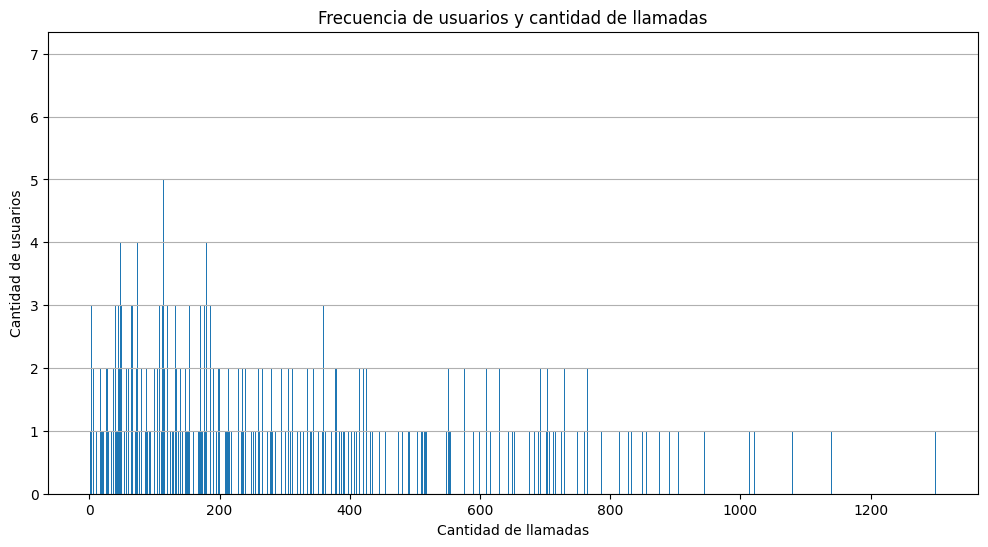

In [167]:
#Enriquecimientos 

#Promedio de duración de las llamadas
calls["duration"] = np.ceil(calls["duration"]).astype(int)
duracion_promedio_llamadas = calls["duration"].mean() 
duracion_mediana_llamadas = calls["duration"].median()

print(f"Duración promedio de llamadas en minutos: {duracion_promedio_llamadas}") #6.745; un poco sesgada por valores elevados. 
print(f"Duración mediana de llamadas en minutos: {duracion_mediana_llamadas}") #5.98 

#Cantidad de minutos estimado es de 1716 usando la mediana. Dividido entre 12 da 143 minutos mensuales y el plan surf da 500. Si se distribuyeran entre los 12 meses surf suele ser más que suficiente para el usuario promedio en cuestión de llamadas.

#Sería interesante revisar en los últimos 3 meses cuál es el promedio de llamadas. 
ultimos_meses = calls[calls["call_date"].dt.month > 10]
promedio_duracion_llamadas_ultimos_meses = ultimos_meses["duration"].mean() #No es muy diferente del promedio de todos los meses 6.74 vs 6.77
promedio_llamadas_ultimos_meses = ultimos_meses.groupby("user_id")["user_id"].count().mean() #117 a 118 llamadas. 117.5
minutos_estimados_ultimos_meses = (promedio_llamadas_ultimos_meses*6.7)/3
print(f"Minutos estimados de llamadas en los ultimos meses donde más se hacen llamadas: {minutos_estimados_ultimos_meses}") #Al rededor de 288 minutos más del plan 
print(f"Costo adicional promedio por usuario debido a llamadas por mes en los meses de más consumo (10 a 12): {minutos_estimados_ultimos_meses*0.03} dólares") #+7.87 dólares en cada uno de los últimos 3 meses debido a llamadas. Faltan ver los patrones de consumo de internet y mensajes. 

#Corregir este gráfico haciendo bins de cantidad de llamadas y solo eje Y el conteo de usuarios. 

#Llamadas por usuario
llamadas_por_usuario = calls.groupby("user_id")["user_id"].count() #conteo de llamadas por usuario anuales. Cada registro es una llamada
frecuencia_usuarios_por_cantidad_llamadas = llamadas_por_usuario.value_counts()
print(llamadas_por_usuario)
print(frecuencia_usuarios_por_cantidad_llamadas)

#Tendencia central de cantidad de llamadas por usuario
promedio_llamadas_por_usuario = llamadas_por_usuario.mean()
mediana_llamadas_por_usuario = llamadas_por_usuario.median()

print(f"Promedio de llamadas anuales por usuario: {promedio_llamadas_por_usuario}") #286 llamadas de promedio debido a valores atípicos puede sesgarse a la derecha el valor central aritmético. 
print(f"Mediana de llamadas anuales por usuario: {mediana_llamadas_por_usuario}") #216 llamadas es lo más representativo para la población. 

#Distribución gráfica de la cantidad de llamadas y cantidad de usuarios
plt.figure(figsize=(12, 6))
plt.bar(frecuencia_usuarios_por_cantidad_llamadas.index, frecuencia_usuarios_por_cantidad_llamadas.values)
plt.title("Frecuencia de usuarios y cantidad de llamadas")
plt.xlabel("Cantidad de llamadas")
plt.ylabel("Cantidad de usuarios")
plt.grid(axis = "y")
plt.show




In [168]:
print(f"Promedio de llamadas por usuario anuales: {llamadas_por_usuario.values.mean()}") #286 llamadas por año por usuario. 

distrib_cantidad_llamadas_tiempo = calls[["call_date", "duration"]]["call_date"].dt.month.value_counts()
print(f"Mediana de las llamadas en los meses: {calls[["call_date", "duration"]]["call_date"].dt.month.median()}") #Definitivamente hay un sesgo a que las llamadas sean hechas al final del año. 
print(f"Mes promedio de las llamadas: {calls[["call_date", "duration"]]["call_date"].dt.month.mean()}")  #9.3
print(f"Conteo de llamadas por mes: {distrib_cantidad_llamadas_tiempo}") #En diciembre se hacen más llamadas


Promedio de llamadas por usuario anuales: 286.35135135135135
Mediana de las llamadas en los meses: 10.0
Mes promedio de las llamadas: 9.320797182996333
Conteo de llamadas por mes: call_date
12    30614
11    24651
10    21064
9     16523
8     13590
7     11105
6      8221
5      5959
4      3442
3      1620
2       774
1       172
Name: count, dtype: int64


## Mensajes

In [169]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()
messages.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Index(['id', 'user_id', 'message_date'], dtype='object')

Messages está compuesto por 3 columnas: ['id', 'user_id', 'message_date'], 76051 registros. 

No hay valores nulos

Tipos de datos. 
Cambiar message_date a fecha. 

Opcional: Revisar id para ver presencia de alfanuméricos.

In [170]:
# Imprime una muestra de datos para los mensajes

print(messages.sample(n=5))

             id  user_id message_date
2706   1028_632     1028   2018-07-04
27939  1172_396     1172   2018-12-03
26294  1159_297     1159   2018-08-18
25606  1154_189     1154   2018-11-07
71210  1465_108     1465   2018-10-12


Acciones correctivas: 

1. Cambiar message_date a fecha o dt. 

### Corregir los datos

In [171]:
messages["message_date"] = pd.to_datetime(messages["message_date"], format = "%Y-%m-%d")
print(messages["message_date"].head())

0   2018-12-27
1   2018-12-31
2   2018-12-31
3   2018-12-27
4   2018-12-26
Name: message_date, dtype: datetime64[ns]


In [172]:
#Revisión de alfanuméricos o formato de id
if any(char.isalpha() for char in messages["id"]): 
    print("ID contiene letras")
else:
    print("ID no contiene letras") 
    
print("No contiene letras pero es objeto porque contiene guión bajo '_' en los ids.")

ID no contiene letras
No contiene letras pero es objeto porque contiene guión bajo '_' en los ids.


### Enriquecer los datos

Posible enriquecimiento: 

Cantidad de mensajes por usuario. 

Tendencia central de llamadas. 

Mensajes por usuario:
user_id
1000     11
1001    207
1002     88
1003     50
1004    177
       ... 
1491    409
1492    108
1494    174
1496     65
1497     50
Name: user_id, Length: 402, dtype: int64

Usuarios por cantidad de mensajes:
user_id
30     6
84     5
14     5
60     5
17     5
      ..
247    1
141    1
378    1
51     1
409    1
Name: count, Length: 246, dtype: int64

Promedio de mensajes por usuario anual: 189.181592039801
Mediana de mensajes por usuario anual: 126.5


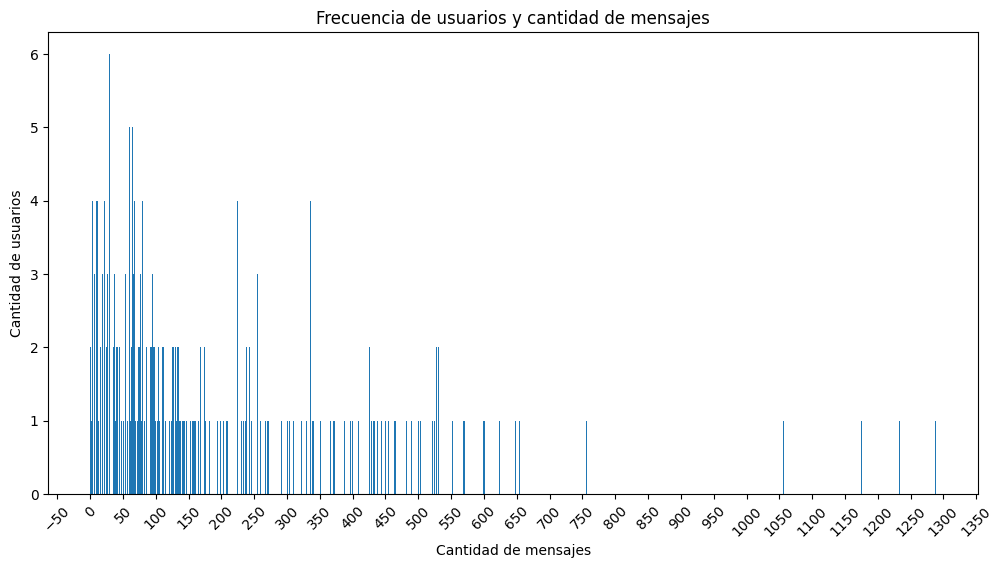

In [173]:
#Agrupar por usuario. Conteo de registros 
mensajes_por_usuario = messages.groupby("user_id")["user_id"].count()
print("Mensajes por usuario:")
print(mensajes_por_usuario)

usuarios_mensajes = mensajes_por_usuario.value_counts()
print() #para mejorar visibilidad de entrega de resultados
print("Usuarios por cantidad de mensajes:")
print(usuarios_mensajes)

#Tendencia central de mensajes 
promedio_mensajes_por_usuario = mensajes_por_usuario.mean() #189 mensajes promedio
mediana_mensajes_por_usuario = mensajes_por_usuario.median() #126.5 mensajes de mediana. Más acertivo para representar la centralidad en este caso ya que hay personas que mensajean mucho, atípicos. 
print()
print(f"Promedio de mensajes por usuario anual: {promedio_mensajes_por_usuario}")
print(f"Mediana de mensajes por usuario anual: {mediana_mensajes_por_usuario}")

#Cuánto contribuye al costo promedio fuera de lo permitido por surf? Este análisis no contempla distribución temporal en este caso.
#print(f"Gasto adicional añadido a plan surf debido a mensajes: {(mediana_mensajes_por_usuario - 50)*0.03}") #3 dolares en promedio añadidos al plan no considerando distribución de gasto a través del tiempo. 
#En el cálculo no se consideró debido

#Sería bueno saber como se distribuye la cantidad de usuarios por cantidad de mensajes 
plt.figure(figsize = (12, 6))
plt.bar(usuarios_mensajes.index, usuarios_mensajes.values)
plt.title("Frecuencia de usuarios y cantidad de mensajes")
plt.xlabel("Cantidad de mensajes")
plt.ylabel("Cantidad de usuarios")
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.xticks(rotation = 45)
plt.show()

#En retrospectiva hubiera sido mejor usar un histograma. Aunque así es información más precisa solo menos estética. 

## Internet

In [174]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()
internet.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')

El marco de datos de consumo de internet se compone por 4 columnas: ['id', 'user_id', 'session_date', 'mb_used'], 104825 registros. 

No hay valores ausentes. 

Tipo de datos de session_date debe ser de tiempo o dt. 

In [175]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.sample(n=5))


              id  user_id session_date  mb_used
94795    1441_46     1441   2018-12-27   679.54
34292   1155_345     1155   2018-07-21   461.22
14710    1067_18     1067   2018-12-25   212.03
100543   1476_52     1476   2018-12-29    22.24
22584   1103_129     1103   2018-10-06    52.59


Acciones correctivas: 

1. Cambio de session_date a dt. 

### Corregir los datos

In [176]:
#Correción de session_date

internet["session_date"] = pd.to_datetime(internet["session_date"], format= "%Y-%m-%d")
print(internet["session_date"].head())

0   2018-12-29
1   2018-12-31
2   2018-12-28
3   2018-12-26
4   2018-12-27
Name: session_date, dtype: datetime64[ns]


### Enriquecer los datos

Posible enriquecimiento: 
Redondeo para entero más próximo superior para mb_used. 
Mb usados por user_id. Permitiría conocer la tendencia de consumo de internet en la muestra. (Se hizo para el año no mensual ya que serían 12 gráficos de otra forma)


Cálculo de promedio de consumo de internet (anual) en mb agrupando por user id y demostrarlo en barras. Eje Y conteo de usuarios, eje X consumo de internet o rangos de consumo de internet. 


Gasto de mb por usuario:
user_id
1000      1903
1001     80540
1002     40339
1003     27069
1004    156548
         ...  
1495     99010
1496     64357
1497     11120
1498    227798
1499     71444
Name: mb_used, Length: 489, dtype: int64


Promedio anual de mb usados por usuario:  78702.96932515338
Mediana anual de mb usados por usuario:  62434.0



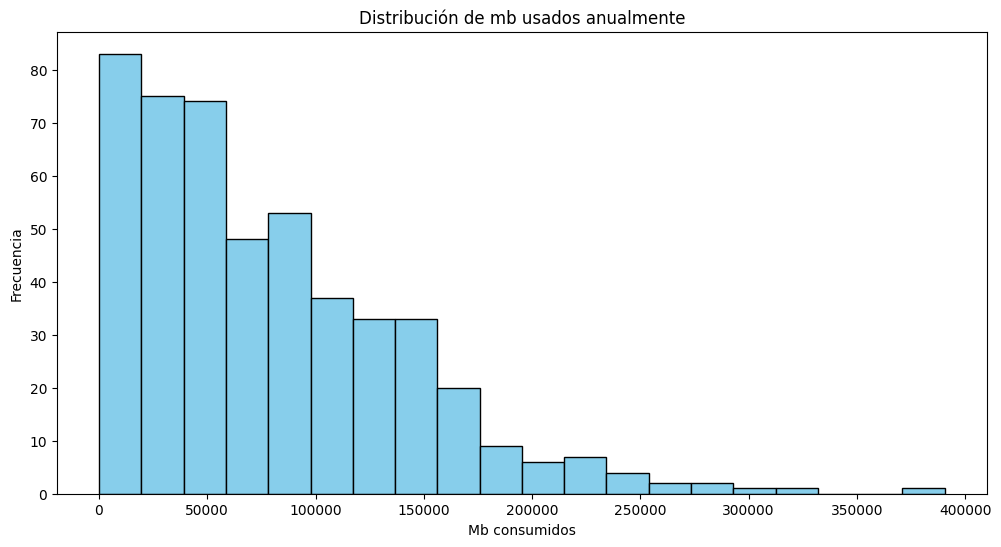

In [177]:

#Redondear uso de internet a mb más cercano arriba. 
internet["mb_used"] = np.ceil(internet["mb_used"]).astype(int)
#Mb usados por usuario 
mb_usuario = internet.groupby("user_id")["mb_used"].sum()
print("Gasto de mb por usuario:")
print(mb_usuario)
print()
#Tendencia central de gasto de mb por usuarios
promedio_mb_usados_por_usuario = mb_usuario.mean() #78611
mediana_mb_usados_por_usuario = mb_usuario.median() #62354
contribucion_de_gasto_extra_considerando_plan_surf = ((mediana_mb_usados_por_usuario/12 - 15360)/1024)*10
print()
print("Promedio anual de mb usados por usuario: ", promedio_mb_usados_por_usuario) #78611
print("Mediana anual de mb usados por usuario: ", mediana_mb_usados_por_usuario) #62354
print()

##Contribución de costos mensuales debido a consumo de internet asumiendo uso igual por mes. 
#print("Estimado de contribución mensual al plan surf por mb usados asumiendo gasto poblacional promedio y distribución de gastos homogenea a través del tiempo: ", contribucion_de_gasto_extra_considerando_plan_surf)
#Contribución negativa no siempre se consumen los megas. 

#Gráfico de distribución de cantidad de usuarios y cantidad de mb usados
plt.figure(figsize=(12,6))
plt.hist(mb_usuario, bins = 20, color = "skyblue", edgecolor = "black")
plt.title("Distribución de mb usados anualmente")
plt.xlabel("Mb consumidos")
plt.ylabel("Frecuencia")
plt.show()

#Interesante, no se si sea muy informativo debido a que el plan es mensual no anual. Fin del enriquecimiento. 

## Estudiar las condiciones de las tarifas

In [178]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
display(plans) 


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Contrasta la cantidad de mensajes, mb y minutos incluidas en el plan así como su respectivo costo. Los servicios extra fuera de plan tienen costo variante siendo más caro para el plan surf. La tendencia es que si se consume mucho el plan más rentable sería ultimate de otra forma surf puede bastar. Explorar el umbral de rendimiento y asignar el más pertinente a las tendencias de consumo de los clientes sería información muy útil. 

## Agregar datos por usuario

Datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. 

In [179]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls["month"] = calls["call_date"].dt.month
llamadas_por_usuario_por_mes = calls.groupby(["user_id", "month"]).size().reset_index(name="llamadas_usuario_mes") #Guardar el resultado = variable calls_user_month
print("Cantidad de llamadas hechas por mes por usuario:")
print(llamadas_por_usuario_por_mes)

Cantidad de llamadas hechas por mes por usuario:
      user_id  month  llamadas_usuario_mes
0        1000     12                    16
1        1001      8                    27
2        1001      9                    49
3        1001     10                    65
4        1001     11                    64
...       ...    ...                   ...
2253     1498     12                    39
2254     1499      9                    41
2255     1499     10                    53
2256     1499     11                    45
2257     1499     12                    65

[2258 rows x 3 columns]


In [180]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls.columns #'id', 'user_id', 'call_date', 'duration', 'month'
minutos_por_usuario_por_mes = calls.groupby(["month", "user_id"])["duration"].sum().reset_index(name="minutos_usuario_mes")
print("Minutos de llamadas usadas por usuario por mes")
print(minutos_por_usuario_por_mes)

Minutos de llamadas usadas por usuario por mes
      month  user_id  minutos_usuario_mes
0         1     1042                  114
1         1     1077                  290
2         1     1185                  181
3         1     1196                  287
4         1     1214                   16
...     ...      ...                  ...
2253     12     1495                  492
2254     12     1496                  294
2255     12     1497                  300
2256     12     1498                  339
2257     12     1499                  496

[2258 rows x 3 columns]


In [181]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages.columns #'id', 'user_id', 'message_date'
messages["month"] = messages["message_date"].dt.month
mensajes_por_usuario_por_mes = messages.groupby(["user_id", "month"]).size().reset_index(name="mensajes_usuario_mes")
print("Mensajes por usuario por mes:")
print(mensajes_por_usuario_por_mes)


Mensajes por usuario por mes:
      user_id  month  mensajes_usuario_mes
0        1000     12                    11
1        1001      8                    30
2        1001      9                    44
3        1001     10                    53
4        1001     11                    36
...       ...    ...                   ...
1801     1496      9                    21
1802     1496     10                    18
1803     1496     11                    13
1804     1496     12                    11
1805     1497     12                    50

[1806 rows x 3 columns]


In [182]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet.columns #'id', 'user_id', 'session_date', 'mb_used'
internet["month"] = internet["session_date"].dt.month

internet_por_usuario_por_mes = internet.groupby(["user_id", "month"])["mb_used"].sum().reset_index(name="internet_usuario_mes")
internet_por_usuario_por_mes["Gb_usuario_mes"] = np.ceil(internet_por_usuario_por_mes["internet_usuario_mes"]/1024)
print("Internet usado por usuario por mes:")
print(internet_por_usuario_por_mes)

Internet usado por usuario por mes:
      user_id  month  internet_usuario_mes  Gb_usuario_mes
0        1000     12                  1903             2.0
1        1001      8                  6929             7.0
2        1001      9                 13333            14.0
3        1001     10                 22356            22.0
4        1001     11                 18524            19.0
...       ...    ...                   ...             ...
2272     1498     12                 23160            23.0
2273     1499      9                 13004            13.0
2274     1499     10                 19515            20.0
2275     1499     11                 16834            17.0
2276     1499     12                 22091            22.0

[2277 rows x 4 columns]


In [183]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
dfs = [llamadas_por_usuario_por_mes, minutos_por_usuario_por_mes, mensajes_por_usuario_por_mes, internet_por_usuario_por_mes]
union_datos_llamadas_minutos_mensajes_internet = reduce(lambda left, right: pd.merge(left, right, on=["user_id", "month"], how="inner"), dfs)
display(union_datos_llamadas_minutos_mensajes_internet)


,user_id,month,llamadas_usuario_mes,minutos_usuario_mes,mensajes_usuario_mes,internet_usuario_mes,Gb_usuario_mes
0,1000,12,16,124,11,1903,2.0
1,1001,8,27,182,30,6929,7.0
2,1001,9,49,315,44,13333,14.0
3,1001,10,65,393,53,22356,22.0
4,1001,11,64,426,36,18524,19.0
...,...,...,...,...,...,...,...
1754,1496,9,52,414,21,16412,17.0
1755,1496,10,46,317,18,14308,14.0
1756,1496,11,39,308,13,8561,9.0
1757,1496,12,40,294,11,16460,17.0


In [184]:
# Añade la información de la tarifa
users.columns #'user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan','churn_date'
#Solo interesa la columna plan 
df_todo_con_tarifa = pd.merge(union_datos_llamadas_minutos_mensajes_internet, users[["user_id", "plan"]], on="user_id", how="left")
display(df_todo_con_tarifa)


,user_id,month,llamadas_usuario_mes,minutos_usuario_mes,mensajes_usuario_mes,internet_usuario_mes,Gb_usuario_mes,plan
0,1000,12,16,124,11,1903,2.0,ultimate
1,1001,8,27,182,30,6929,7.0,surf
2,1001,9,49,315,44,13333,14.0,surf
3,1001,10,65,393,53,22356,22.0,surf
4,1001,11,64,426,36,18524,19.0,surf
...,...,...,...,...,...,...,...,...
1754,1496,9,52,414,21,16412,17.0,surf
1755,1496,10,46,317,18,14308,14.0,surf
1756,1496,11,39,308,13,8561,9.0,surf
1757,1496,12,40,294,11,16460,17.0,surf


In [185]:
# Calcula el ingreso mensual para cada usuario
plans.columns #'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute','plan_name'

#Restar lo incluido en el paquete (*'messages_included', 'mb_per_month_included', 'minutes_included') a los datos de df_todo para internet, mensajes y minutos *minutos_usuario_mes, internet_usuario_mes, mensajes_usuario_mes
#si lo consumido es menos que lo incluido dará negativos, se tienen que igualar los negativos a 0.
surf_values = plans[plans["plan_name"] == "surf"].iloc[0]
ultimate_values = plans[plans["plan_name"] == "ultimate"].iloc[0]

mask_surf = df_todo_con_tarifa["plan"] == "surf"
mask_ultimate = df_todo_con_tarifa["plan"] == "ultimate"

#surf calculations
df_todo_con_tarifa.loc[mask_surf, "mensajes_extra"] =df_todo_con_tarifa["mensajes_usuario_mes"] - surf_values["messages_included"] 
df_todo_con_tarifa.loc[mask_surf, "minutos_extra"]  =df_todo_con_tarifa["minutos_usuario_mes"] - surf_values["minutes_included"]
df_todo_con_tarifa.loc[mask_surf, "internet_extra_Gb"] =df_todo_con_tarifa["Gb_usuario_mes"] - (surf_values["mb_per_month_included"]/1024)
#ultimate calculations
df_todo_con_tarifa.loc[mask_ultimate, "mensajes_extra"] =df_todo_con_tarifa["mensajes_usuario_mes"] - ultimate_values["messages_included"] 
df_todo_con_tarifa.loc[mask_ultimate, "minutos_extra"]  =df_todo_con_tarifa["minutos_usuario_mes"] - ultimate_values["minutes_included"]
df_todo_con_tarifa.loc[mask_ultimate, "internet_extra_Gb"] =df_todo_con_tarifa["Gb_usuario_mes"] - (ultimate_values["mb_per_month_included"]/1024)

print("Calculos de servicios extra por usuario por mes")
display(df_todo_con_tarifa) #tiene numeros negativos en los extra
#remover los numeros negativos
df_todo_con_tarifa["mensajes_extra"] = df_todo_con_tarifa["mensajes_extra"].clip(lower=0)
df_todo_con_tarifa["internet_extra_Gb"] = df_todo_con_tarifa["internet_extra_Gb"].clip(lower=0)
df_todo_con_tarifa["minutos_extra"] = df_todo_con_tarifa["minutos_extra"].clip(lower=0)

print()
print("Calculos de servicios extra por usuario por mes con remoción de números negativos")
display(df_todo_con_tarifa) #ya no hay numeros negativos

#Añadir la multiplicación de lo extra a lo incluido por las tarifas *'usd_per_gb', 'usd_per_message', 'usd_per_minute'. Se ocupará usar if. 
df_todo_con_tarifa.loc[mask_surf, "costo_internet_extra"] = df_todo_con_tarifa["internet_extra_Gb"]*surf_values["usd_per_gb"]
df_todo_con_tarifa.loc[mask_surf, "costo_minutos_extra"] = df_todo_con_tarifa["minutos_extra"]*surf_values["usd_per_minute"]
df_todo_con_tarifa.loc[mask_surf, "costo_mensajes_extra"] = df_todo_con_tarifa["mensajes_extra"]*surf_values["usd_per_message"]

df_todo_con_tarifa.loc[mask_ultimate, "costo_internet_extra"] = df_todo_con_tarifa["internet_extra_Gb"]*ultimate_values["usd_per_gb"]
df_todo_con_tarifa.loc[mask_ultimate, "costo_minutos_extra"] = df_todo_con_tarifa["minutos_extra"]*ultimate_values["usd_per_minute"]
df_todo_con_tarifa.loc[mask_ultimate, "costo_mensajes_extra"] = df_todo_con_tarifa["mensajes_extra"]*ultimate_values["usd_per_message"]
print()
print("Adición de costos debido a servicios extra por usuario por mes")
display(df_todo_con_tarifa) #se añadieron los costos extras por internet, mensajes y llamadas queda hacer el total con el pago de surf y ultimate añadido
df_todo_con_tarifa.loc[mask_surf, "costo_total"]  = df_todo_con_tarifa["costo_internet_extra"] + df_todo_con_tarifa["costo_mensajes_extra"]+ df_todo_con_tarifa["costo_minutos_extra"] +surf_values["usd_monthly_pay"]
df_todo_con_tarifa.loc[mask_ultimate, "costo_total"] = df_todo_con_tarifa["costo_internet_extra"] + df_todo_con_tarifa["costo_mensajes_extra"]+ df_todo_con_tarifa["costo_minutos_extra"] +ultimate_values["usd_monthly_pay"]
print()
print("Marco de datos completo. Se le adicionó el ingreso generado por usuario por mes.")
display(df_todo_con_tarifa) #con el costo total o ingreso por usuario por mes añadido. 

Calculos de servicios extra por usuario por mes


,user_id,month,llamadas_usuario_mes,minutos_usuario_mes,mensajes_usuario_mes,internet_usuario_mes,Gb_usuario_mes,plan,mensajes_extra,minutos_extra,internet_extra_Gb
0,1000,12,16,124,11,1903,2.0,ultimate,-989.0,-2876.0,-28.0
1,1001,8,27,182,30,6929,7.0,surf,-20.0,-318.0,-8.0
2,1001,9,49,315,44,13333,14.0,surf,-6.0,-185.0,-1.0
3,1001,10,65,393,53,22356,22.0,surf,3.0,-107.0,7.0
4,1001,11,64,426,36,18524,19.0,surf,-14.0,-74.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,9,52,414,21,16412,17.0,surf,-29.0,-86.0,2.0
1755,1496,10,46,317,18,14308,14.0,surf,-32.0,-183.0,-1.0
1756,1496,11,39,308,13,8561,9.0,surf,-37.0,-192.0,-6.0
1757,1496,12,40,294,11,16460,17.0,surf,-39.0,-206.0,2.0



Calculos de servicios extra por usuario por mes con remoción de números negativos


,user_id,month,llamadas_usuario_mes,minutos_usuario_mes,mensajes_usuario_mes,internet_usuario_mes,Gb_usuario_mes,plan,mensajes_extra,minutos_extra,internet_extra_Gb
0,1000,12,16,124,11,1903,2.0,ultimate,0.0,0.0,0.0
1,1001,8,27,182,30,6929,7.0,surf,0.0,0.0,0.0
2,1001,9,49,315,44,13333,14.0,surf,0.0,0.0,0.0
3,1001,10,65,393,53,22356,22.0,surf,3.0,0.0,7.0
4,1001,11,64,426,36,18524,19.0,surf,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,9,52,414,21,16412,17.0,surf,0.0,0.0,2.0
1755,1496,10,46,317,18,14308,14.0,surf,0.0,0.0,0.0
1756,1496,11,39,308,13,8561,9.0,surf,0.0,0.0,0.0
1757,1496,12,40,294,11,16460,17.0,surf,0.0,0.0,2.0



Adición de costos debido a servicios extra por usuario por mes


,user_id,month,llamadas_usuario_mes,minutos_usuario_mes,mensajes_usuario_mes,internet_usuario_mes,Gb_usuario_mes,plan,mensajes_extra,minutos_extra,internet_extra_Gb,costo_internet_extra,costo_minutos_extra,costo_mensajes_extra
0,1000,12,16,124,11,1903,2.0,ultimate,0.0,0.0,0.0,0.0,0.0,0.00
1,1001,8,27,182,30,6929,7.0,surf,0.0,0.0,0.0,0.0,0.0,0.00
2,1001,9,49,315,44,13333,14.0,surf,0.0,0.0,0.0,0.0,0.0,0.00
3,1001,10,65,393,53,22356,22.0,surf,3.0,0.0,7.0,70.0,0.0,0.09
4,1001,11,64,426,36,18524,19.0,surf,0.0,0.0,4.0,40.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,9,52,414,21,16412,17.0,surf,0.0,0.0,2.0,20.0,0.0,0.00
1755,1496,10,46,317,18,14308,14.0,surf,0.0,0.0,0.0,0.0,0.0,0.00
1756,1496,11,39,308,13,8561,9.0,surf,0.0,0.0,0.0,0.0,0.0,0.00
1757,1496,12,40,294,11,16460,17.0,surf,0.0,0.0,2.0,20.0,0.0,0.00



Marco de datos completo. Se le adicionó el ingreso generado por usuario por mes.


,user_id,month,llamadas_usuario_mes,minutos_usuario_mes,mensajes_usuario_mes,internet_usuario_mes,Gb_usuario_mes,plan,mensajes_extra,minutos_extra,internet_extra_Gb,costo_internet_extra,costo_minutos_extra,costo_mensajes_extra,costo_total
0,1000,12,16,124,11,1903,2.0,ultimate,0.0,0.0,0.0,0.0,0.0,0.00,70.00
1,1001,8,27,182,30,6929,7.0,surf,0.0,0.0,0.0,0.0,0.0,0.00,20.00
2,1001,9,49,315,44,13333,14.0,surf,0.0,0.0,0.0,0.0,0.0,0.00,20.00
3,1001,10,65,393,53,22356,22.0,surf,3.0,0.0,7.0,70.0,0.0,0.09,90.09
4,1001,11,64,426,36,18524,19.0,surf,0.0,0.0,4.0,40.0,0.0,0.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,9,52,414,21,16412,17.0,surf,0.0,0.0,2.0,20.0,0.0,0.00,40.00
1755,1496,10,46,317,18,14308,14.0,surf,0.0,0.0,0.0,0.0,0.0,0.00,20.00
1756,1496,11,39,308,13,8561,9.0,surf,0.0,0.0,0.0,0.0,0.0,0.00,20.00
1757,1496,12,40,294,11,16460,17.0,surf,0.0,0.0,2.0,20.0,0.0,0.00,40.00


## Estudia el comportamiento de usuario

### Llamadas

    month  duracion_promedio_llamadas_surf
0       1                       292.000000
1       2                       331.200000
2       3                       344.937500
3       4                       366.228571
4       5                       443.981132
5       6                       425.514286
6       7                       452.101124
7       8                       427.873950
8       9                       426.020408
9      10                       442.348066
10     11                       443.954128
11     12                       495.069106
    month  duracion_promedio_llamadas_ultimate
0       1                           197.666667
1       2                           486.800000
2       3                           415.285714
3       4                           322.750000
4       5                           410.190476
5       6                           370.918919
6       7                           439.638298
7       8                           436.438596
8       9         

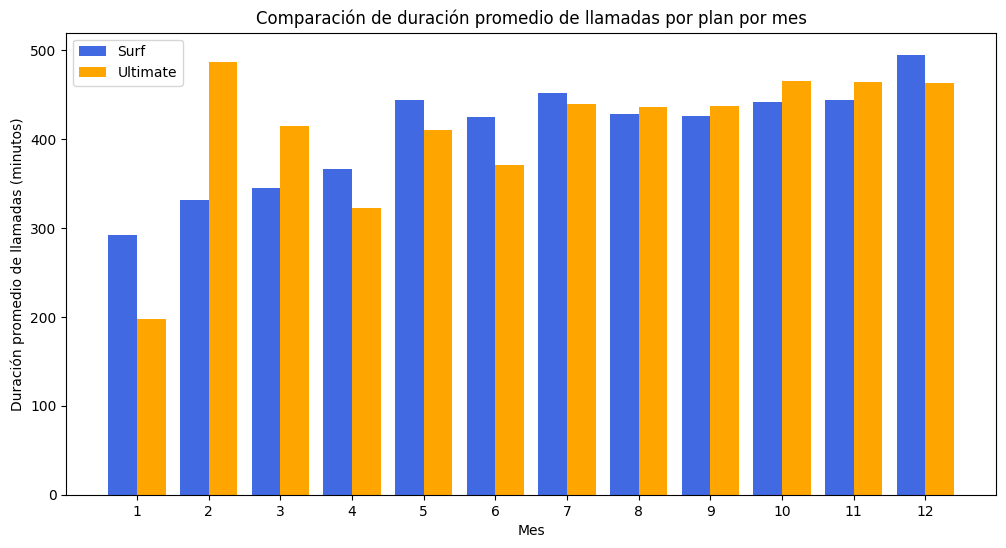

In [186]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

#Se puede hacer desde calls o desde df_todo_con_tarifa. df_todo_con_tarifa columna minutos. 
# Duración promedio de la suma de las llamadas por plan por mes. No por usuario ni la duración de la llamada promedio. 
#Si se busca promedio de llamada se tiene que dividir entre cantidad de llamadas y listo. 

duracion_promedio_surf_mes = df_todo_con_tarifa.loc[mask_surf, ["user_id", "minutos_usuario_mes", "month"]].groupby("month")["minutos_usuario_mes"].mean().reset_index(name="duracion_promedio_llamadas_surf")
duracion_promedio_ultimate_mes = df_todo_con_tarifa.loc[mask_ultimate, ["user_id", "minutos_usuario_mes", "month"]].groupby("month")["minutos_usuario_mes"].mean().reset_index(name="duracion_promedio_llamadas_ultimate")

print(duracion_promedio_surf_mes)
print(duracion_promedio_ultimate_mes)

#Gráfico para comparar las distintas tendencias de duración por mes entre ambos planes. 
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(duracion_promedio_surf_mes["month"]))
plt.bar(x-bar_width/2, duracion_promedio_surf_mes["duracion_promedio_llamadas_surf"], width= bar_width, color = "royalblue", label = "Surf")
plt.bar(x+bar_width/2, duracion_promedio_ultimate_mes["duracion_promedio_llamadas_ultimate"], width= bar_width, color = "orange", label = "Ultimate")
plt.title("Comparación de duración promedio de llamadas por plan por mes")
plt.xlabel("Mes")
plt.ylabel("Duración promedio de llamadas (minutos)")
plt.legend()
plt.xticks(x, duracion_promedio_surf_mes["month"])
plt.show()
#No es mucha la diferencia de consumo entre planes considerando que son promedios. 


      user_id  month  llamadas_usuario_mes  minutos_usuario_mes  \
1        1001      8                    27                  182   
2        1001      9                    49                  315   
3        1001     10                    65                  393   
4        1001     11                    64                  426   
5        1001     12                    56                  412   
...       ...    ...                   ...                  ...   
1753     1496      8                    18                  122   
1754     1496      9                    52                  414   
1755     1496     10                    46                  317   
1756     1496     11                    39                  308   
1757     1496     12                    40                  294   

      promedio_minutos_por_llamada  
1                         6.740741  
2                         6.428571  
3                         6.046154  
4                         6.656250  
5         

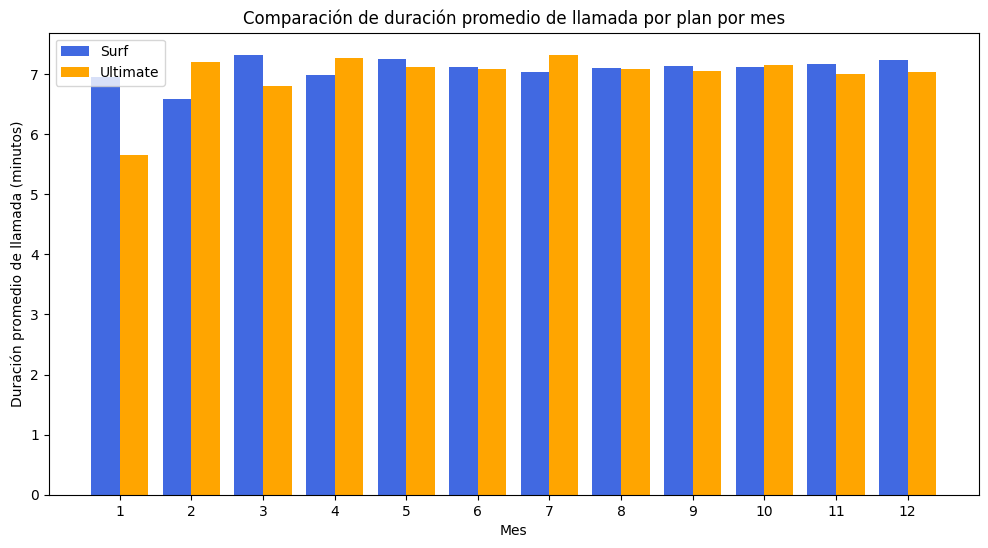

In [187]:
#Por si se quiere la duración promedio de llamada a través de los meses en cada plan: 

#Aislas los marcos de datos y columnas deseadas por plan. 
promedio_por_llamada_surf = df_todo_con_tarifa.loc[mask_surf, ["user_id", "month", "llamadas_usuario_mes", "minutos_usuario_mes"]]
promedio_por_llamada_ultimate = df_todo_con_tarifa.loc[mask_ultimate, ["user_id", "month", "llamadas_usuario_mes", "minutos_usuario_mes"]]

promedio_por_llamada_surf["promedio_minutos_por_llamada"] = promedio_por_llamada_surf["minutos_usuario_mes"]/promedio_por_llamada_surf["llamadas_usuario_mes"]
promedio_por_llamada_ultimate["promedio_minutos_por_llamada"] = promedio_por_llamada_ultimate["minutos_usuario_mes"]/promedio_por_llamada_ultimate["llamadas_usuario_mes"]

print(promedio_por_llamada_surf)
print(promedio_por_llamada_ultimate)

#Agrupar por mes por plan y general el gráfico de barras
promedio_duracion_llamada_por_mes_surf = promedio_por_llamada_surf[["month","user_id", "promedio_minutos_por_llamada"]].groupby(["month"])["promedio_minutos_por_llamada"].mean().reset_index(name = "promedio_minutos_llamada_mes_surf")
promedio_duracion_llamada_por_mes_ultimate = promedio_por_llamada_ultimate[["month", "user_id", "promedio_minutos_por_llamada"]].groupby(["month"])["promedio_minutos_por_llamada"].mean().reset_index(name = "promedio_minutos_llamada_mes_ultimate")

print(promedio_duracion_llamada_por_mes_surf)
print(promedio_duracion_llamada_por_mes_ultimate) #Está listo para graficar. 

#Gráfico de promedio de duración de llamadas por 
plt.figure(figsize=(12, 6))

bar_width = 0.4
x = np.arange(len(promedio_duracion_llamada_por_mes_surf["month"]))
plt.bar(x-bar_width/2, promedio_duracion_llamada_por_mes_surf["promedio_minutos_llamada_mes_surf"], width= bar_width, color = "royalblue", label = "Surf")
plt.bar(x+bar_width/2, promedio_duracion_llamada_por_mes_ultimate["promedio_minutos_llamada_mes_ultimate"], width= bar_width, color = "orange", label = "Ultimate")
plt.title("Comparación de duración promedio de llamada por plan por mes")
plt.xlabel("Mes")
plt.ylabel("Duración promedio de llamada (minutos)")
plt.legend()
plt.xticks(x, promedio_duracion_llamada_por_mes_surf["month"])
plt.show()

               minutos_usuario_mes
month user_id                     
1     1362                     292
2     1099                      39
      1138                     307
      1261                      56
      1362                     811
...                            ...
12    1489                     394
      1491                     399
      1492                     295
      1494                     431
      1496                     294

[1180 rows x 1 columns]
               minutos_usuario_mes
month user_id                     
1     1077                     290
      1196                     287
      1214                      16
2     1077                     776
      1155                      90
...                            ...
12    1477                     289
      1478                     376
      1482                      56
      1487                     416
      1497                     300

[579 rows x 1 columns]


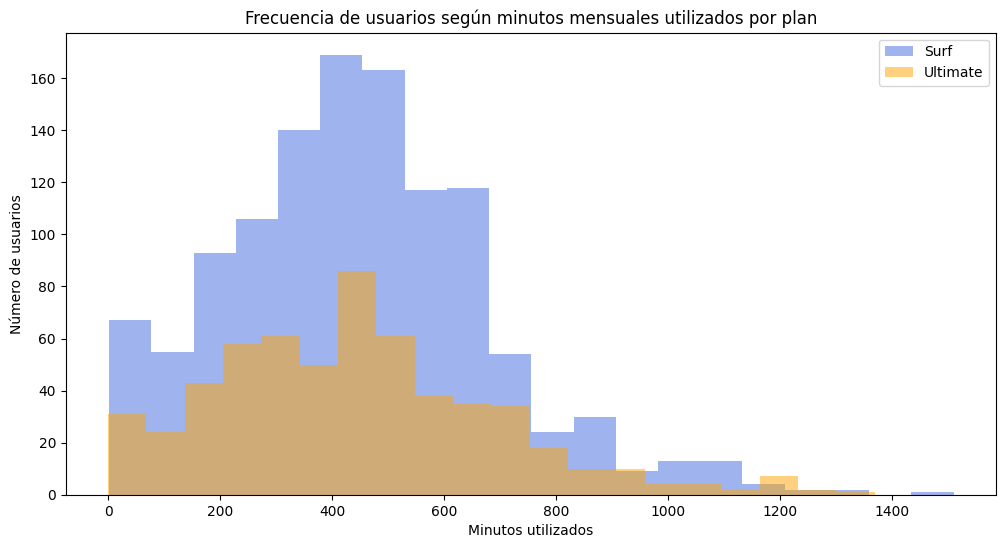

In [188]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
#Frecuencia de usuarios variable cantidad de minutos por plan. El histograma lo separa en la cantidad de contenedores que se ocupen para abarcar el rango de minutos. 
#Un histograma no esta hecho para comparar al menos que se use transparencia. Por otra parte, no importa que mes es entonces con que la unidad sea conteo de usuarios en cantidad de minutos mensuales basta. Sino serían 12 histogramas.
frecuencia_usuarios_minutos_por_mes_por_plan_surf = df_todo_con_tarifa.loc[mask_surf, ["month","user_id", "minutos_usuario_mes"]].groupby(["month", "user_id"]).sum()
frecuencia_usuarios_minutos_por_mes_por_plan_ultimate = df_todo_con_tarifa.loc[mask_ultimate, ["month","user_id", "minutos_usuario_mes"]].groupby(["month", "user_id"]).sum()

print(frecuencia_usuarios_minutos_por_mes_por_plan_surf)
print(frecuencia_usuarios_minutos_por_mes_por_plan_ultimate)

#obtener solo los valores sin importar a que mes pertenecen y hacer el histograma. 
minutos_usuario_mes_surf = frecuencia_usuarios_minutos_por_mes_por_plan_surf["minutos_usuario_mes"].values
minutos_usuario_mes_ultimate = frecuencia_usuarios_minutos_por_mes_por_plan_ultimate["minutos_usuario_mes"].values

plt.figure(figsize=(12, 6))
plt.hist(minutos_usuario_mes_surf, bins=20, alpha=0.5, color='royalblue', label="Surf")
plt.hist(minutos_usuario_mes_ultimate, bins=20, alpha=0.5, color='orange', label="Ultimate")
plt.title("Frecuencia de usuarios según minutos mensuales utilizados por plan")
plt.xlabel("Minutos utilizados")
plt.ylabel("Número de usuarios")
plt.legend()
plt.show()


In [189]:
# Calcula la media y la varianza de la duración mensual de llamadas. Comportamiento de consumo de minutos.
#La instrucción es de la duración total de las llamadas o de cada llamada?
#Ambas son interesantes. Primero de duración total o consumo de minutos y le adicionaré desviación estándar ya que es informativo.

#Promedio de los minutos consumidos mensuales por plan por usuario. Para checar el promedio de consumo de los usuarios como población.
promedio_minutos_mes_usuario_surf =  df_todo_con_tarifa.loc[mask_surf, ["month", "minutos_usuario_mes"]].groupby("month")["minutos_usuario_mes"].mean().reset_index(name="promedio_minutos_usados_al_mes")
promedio_minutos_mes_usuario_ultimate =  df_todo_con_tarifa.loc[mask_ultimate, ["month", "minutos_usuario_mes"]].groupby("month")["minutos_usuario_mes"].mean().reset_index(name="promedio_minutos_usados_al_mes")
print("Promedio minutos usados al mes por usuario plan surf:")
print(promedio_minutos_mes_usuario_surf)
print("Promedio minutos usados al mes por usuario plan ultimate:")
print(promedio_minutos_mes_usuario_ultimate) #son para comparar el consumo por mes de minutos por plan. 1er gráfico de caja;boxplot

promedio_general_minutos_mes_usuario_surf = promedio_minutos_mes_usuario_surf["promedio_minutos_usados_al_mes"].mean()
promedio_general_minutos_mes_usuario_ultimate = promedio_minutos_mes_usuario_ultimate["promedio_minutos_usados_al_mes"].mean()
mediana_minutos_mes_usuario_surf = promedio_minutos_mes_usuario_surf["promedio_minutos_usados_al_mes"].median()
mediana_minutos_mes_usuario_ultimate = promedio_minutos_mes_usuario_ultimate["promedio_minutos_usados_al_mes"].median()

varianza_minutos_usuario_mes_surf = promedio_minutos_mes_usuario_surf["promedio_minutos_usados_al_mes"].var()
varianza_minutos_usuario_mes_ultimate = promedio_minutos_mes_usuario_ultimate["promedio_minutos_usados_al_mes"].var()
#Adición de desviación estándar    
desv_est_minutos_usuario_mes_surf = np.sqrt(varianza_minutos_usuario_mes_surf)
desv_est_minutos_usuario_mes_ultimate = np.sqrt(varianza_minutos_usuario_mes_ultimate)

print("Promedio, Mediana, Varianza y Desviación estándar para minutos por usuario al mes surf:")
print(promedio_general_minutos_mes_usuario_surf,",",mediana_minutos_mes_usuario_surf, ";",varianza_minutos_usuario_mes_surf ,";",desv_est_minutos_usuario_mes_surf)
print("Promedio, Mediana, Varianza y Desviación para minutos por usuario al mes ultimate:")
print(promedio_general_minutos_mes_usuario_ultimate,",",mediana_minutos_mes_usuario_ultimate, ";",varianza_minutos_usuario_mes_ultimate ,";",desv_est_minutos_usuario_mes_ultimate)

#Ahora continuaré con la duración de la llamada promedio mensual, varianza y desviación estándar para surf y para ultimate. 
#Con esto se puede saber si en general gastan más tiempo por llamada dependiendo del plan. 

#Aislar los datos de todas las llamadas. 
datos_para_duración_promedio_llamadas_mensual_surf = df_todo_con_tarifa.loc[mask_surf, ["month", "llamadas_usuario_mes", "minutos_usuario_mes"]]
datos_para_duración_promedio_llamadas_mensual_ultimate = df_todo_con_tarifa.loc[mask_ultimate, ["month", "llamadas_usuario_mes", "minutos_usuario_mes"]]

#generar columna de llamada promedio. llamadas entre minutos consumidos
datos_para_duración_promedio_llamadas_mensual_surf["duracion_promedio_de_llamada_mensual"] = datos_para_duración_promedio_llamadas_mensual_surf["minutos_usuario_mes"]/datos_para_duración_promedio_llamadas_mensual_surf["llamadas_usuario_mes"]
datos_para_duración_promedio_llamadas_mensual_ultimate["duracion_promedio_de_llamada_mensual"] = datos_para_duración_promedio_llamadas_mensual_ultimate["minutos_usuario_mes"]/datos_para_duración_promedio_llamadas_mensual_ultimate["llamadas_usuario_mes"]

display(datos_para_duración_promedio_llamadas_mensual_surf) #Para observar como se ven mis datos meramente. 
#Sacar un promedio de la duración promedio. Este promedio consiste en representar todas las duraciones de llamada por mes. Es decir sumar los promedios al mes de todos los usuarios y dividirlo entre todos los usuarios por plan.

duracion_promedio_llamadas_mensual_surf = datos_para_duración_promedio_llamadas_mensual_surf.groupby("month")["duracion_promedio_de_llamada_mensual"].mean().reset_index(name="duracion_promedio_de_llamada_por_mes")
duracion_promedio_llamadas_mensual_ultimate = datos_para_duración_promedio_llamadas_mensual_ultimate.groupby("month")["duracion_promedio_de_llamada_mensual"].mean().reset_index(name="duracion_promedio_de_llamada_por_mes")
#Si no se agrupa por user_id se sabe la duración promedio mensual por plan. Si se agrupa por user_id tmbn pues es duracion promedio mensual por plan por usuario. 
#Se agrupó por user_id para poder ver los datos por usuario en el box plot. En lugar de solo tener un dato por mes.
print("surf:")
print(duracion_promedio_llamadas_mensual_surf)
print("ultimate:")
print(duracion_promedio_llamadas_mensual_ultimate)

varianza_duracion_promedio_llamadas_usuario_mes_surf = duracion_promedio_llamadas_mensual_surf["duracion_promedio_de_llamada_por_mes"].var()
varianza_duracion_promedio_llamadas_usuario_mes_ultimate = duracion_promedio_llamadas_mensual_ultimate["duracion_promedio_de_llamada_por_mes"].var()
#Listo para graficar;falta sacar la varianza y desviación estandar. 
desv_est_llamadas_usuario_surf = mt.sqrt(varianza_duracion_promedio_llamadas_usuario_mes_surf)
desv_est_llamadas_usuario_ultimate = mt.sqrt(varianza_duracion_promedio_llamadas_usuario_mes_ultimate)
print("Varianza de duracion promedio de las llamadas surf:", varianza_duracion_promedio_llamadas_usuario_mes_surf)
print("Varianza de duracion promedio de las llamadas surf:", varianza_duracion_promedio_llamadas_usuario_mes_ultimate)

print("Desviacion estándar de la duración de llamadas surf:", desv_est_llamadas_usuario_surf)
print("Desviacion estándar de la duración de llamadas ultimate:", desv_est_llamadas_usuario_ultimate)

Promedio minutos usados al mes por usuario plan surf:
    month  promedio_minutos_usados_al_mes
0       1                      292.000000
1       2                      331.200000
2       3                      344.937500
3       4                      366.228571
4       5                      443.981132
5       6                      425.514286
6       7                      452.101124
7       8                      427.873950
8       9                      426.020408
9      10                      442.348066
10     11                      443.954128
11     12                      495.069106
Promedio minutos usados al mes por usuario plan ultimate:
    month  promedio_minutos_usados_al_mes
0       1                      197.666667
1       2                      486.800000
2       3                      415.285714
3       4                      322.750000
4       5                      410.190476
5       6                      370.918919
6       7                      439.638298
7     

,month,llamadas_usuario_mes,minutos_usuario_mes,duracion_promedio_de_llamada_mensual
1,8,27,182,6.740741
2,9,49,315,6.428571
3,10,65,393,6.046154
4,11,64,426,6.656250
5,12,56,412,7.357143
...,...,...,...,...
1753,8,18,122,6.777778
1754,9,52,414,7.961538
1755,10,46,317,6.891304
1756,11,39,308,7.897436


surf:
    month  duracion_promedio_de_llamada_por_mes
0       1                              6.952381
1       2                              6.578077
2       3                              7.321056
3       4                              6.985401
4       5                              7.242443
5       6                              7.118685
6       7                              7.030025
7       8                              7.102217
8       9                              7.134543
9      10                              7.112521
10     11                              7.167284
11     12                              7.233960
ultimate:
    month  duracion_promedio_de_llamada_por_mes
0       1                              5.646032
1       2                              7.202633
2       3                              6.796706
3       4                              7.264173
4       5                              7.122373
5       6                              7.077209
6       7               

In [190]:
#Si no es por usuario sino consumo general sin sacar promedio al mes: 
#sumar lo consumido por cada usuario
total_minutos_mes_surf =  df_todo_con_tarifa.loc[mask_surf, ["month", "minutos_usuario_mes"]].groupby("month")["minutos_usuario_mes"].sum().reset_index(name="total_minutos_usados_al_mes")
total_minutos_mes_ultimate =  df_todo_con_tarifa.loc[mask_ultimate, ["month", "minutos_usuario_mes"]].groupby("month")["minutos_usuario_mes"].sum().reset_index(name="total_minutos_usados_al_mes")
promedio_minutos_mes_surf =  total_minutos_mes_surf.groupby("month")["total_minutos_usados_al_mes"].mean().reset_index(name="promedio_minutos_usados_al_mes")
promedio_minutos_mes_ultimate =  total_minutos_mes_ultimate.groupby("month")["total_minutos_usados_al_mes"].mean().reset_index(name="promedio_minutos_usados_al_mes")
print("Promedio minutos usados al mes plan surf:")
print(promedio_minutos_mes_surf)
print("Promedio minutos usados al mes plan ultimate:")
print(promedio_minutos_mes_ultimate) #son para comparar el consumo por mes de minutos por plan. 1er gráfico de caja;boxplot

promedio_general_mensual_surf = promedio_minutos_mes_surf["promedio_minutos_usados_al_mes"].mean()
promedio_general_mensual_ultimate = promedio_minutos_mes_ultimate["promedio_minutos_usados_al_mes"].mean()
print("Promedio de los minutos mensuales surf:", promedio_general_mensual_surf)
print("Promedio de los minutos mensuales ultimate:", promedio_general_mensual_ultimate)
varianza_minutos_mes_surf_no_por_usuario =  promedio_minutos_mes_surf["promedio_minutos_usados_al_mes"].var()
varianza_minutos_mes_ultimate_no_por_usuario =  promedio_minutos_mes_ultimate["promedio_minutos_usados_al_mes"].var()
desv_est_minutos_mes_surf_no_por_usuario =  np.sqrt(varianza_minutos_mes_surf_no_por_usuario)
desv_est_minutos_mes_ultimate_no_por_usuario =  np.sqrt(varianza_minutos_mes_ultimate_no_por_usuario)

print("Varianza y desviación estándar de minutos al mes plan surf:", varianza_minutos_mes_surf_no_por_usuario, ";", desv_est_minutos_mes_surf_no_por_usuario)
print("Varianza y desviación estándar de minutos al mes plan ultimate:", varianza_minutos_mes_ultimate_no_por_usuario, ";", desv_est_minutos_mes_ultimate_no_por_usuario)
mediana_promedio_minutos_mensuales_surf = promedio_minutos_mes_surf["promedio_minutos_usados_al_mes"].median()
mediana_promedio_minutos_mensuales_ultimate = promedio_minutos_mes_ultimate["promedio_minutos_usados_al_mes"].median()
print("Mediana de promedio de minutos por mes para el plan surf:", mediana_promedio_minutos_mensuales_surf)
print("Mediana de promedio de minutos por mes para el plan ultimate:", mediana_promedio_minutos_mensuales_ultimate)

Promedio minutos usados al mes plan surf:
    month  promedio_minutos_usados_al_mes
0       1                           292.0
1       2                          1656.0
2       3                          5519.0
3       4                         12818.0
4       5                         23531.0
5       6                         29786.0
6       7                         40237.0
7       8                         50917.0
8       9                         62625.0
9      10                         80065.0
10     11                         96782.0
11     12                        121787.0
Promedio minutos usados al mes plan ultimate:
    month  promedio_minutos_usados_al_mes
0       1                           593.0
1       2                          2434.0
2       3                          2907.0
3       4                          5164.0
4       5                          8614.0
5       6                         13724.0
6       7                         20663.0
7       8                     

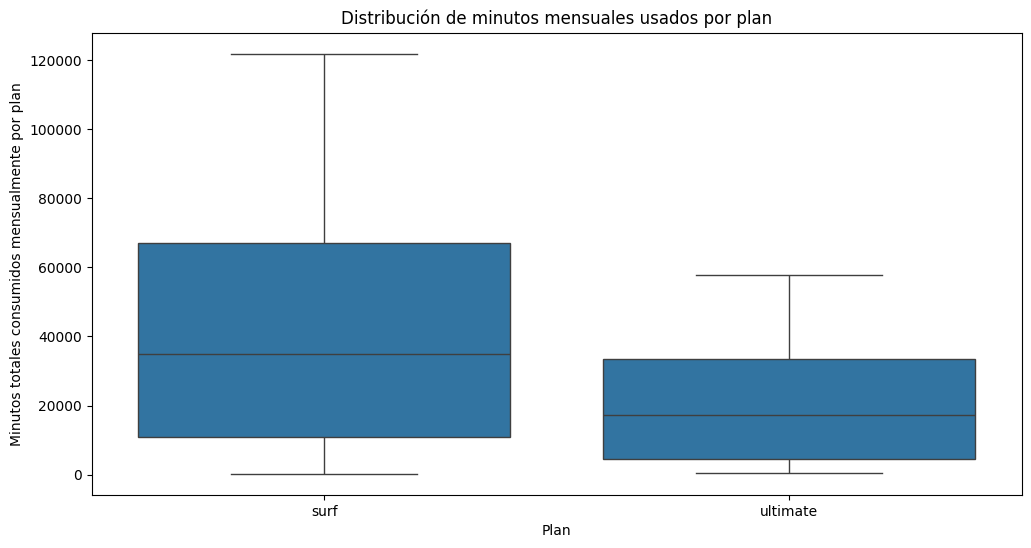

In [191]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

#Se quiere ver el comportamiento de consumo de los usuarios. 
#Se hará un diagrama de caja para duración mensual de la llamada promedio por cada plan. 
#Y un segundo diagrama de caja para total de minutos consumidos por usuario promedio. 

#1er caja. Minutos usados al mes por plan
#unir los datos relevantes en un marco de datos. 
promedio_minutos_mes_surf["plan"] = "surf"
promedio_minutos_mes_ultimate["plan"] = "ultimate" #'month', 'promedio_minutos_usados_al_mes_ultimate'
promedios_minutos_usuario_mes_ambos_planes = pd.concat([promedio_minutos_mes_surf, promedio_minutos_mes_ultimate])

#Graficar
plt.figure(figsize=(12, 6))
sns.boxplot(data = promedios_minutos_usuario_mes_ambos_planes, x = "plan", y= "promedio_minutos_usados_al_mes")
plt.title("Distribución de minutos mensuales usados por plan")
plt.xlabel("Plan")
plt.ylabel("Minutos totales consumidos mensualmente por plan")
plt.show()

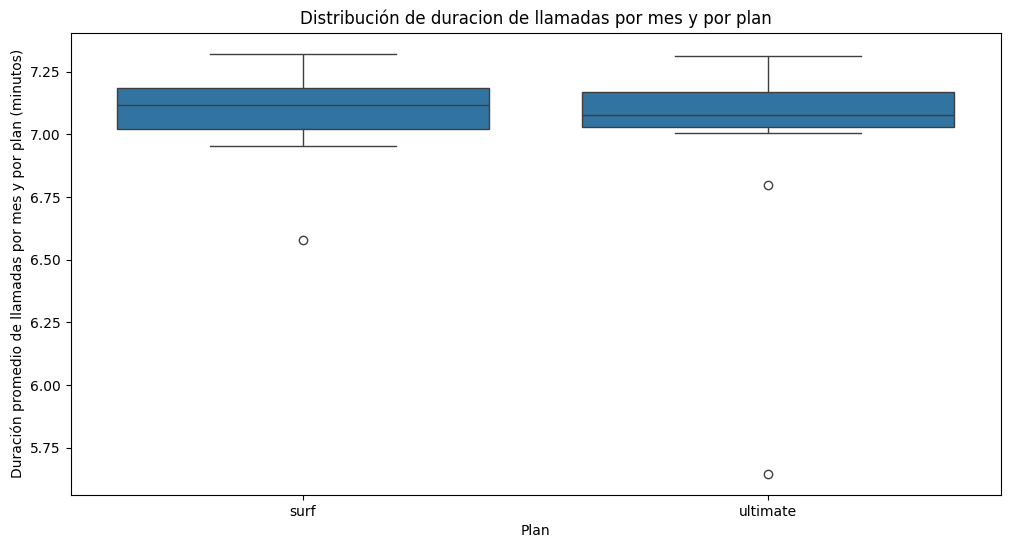

In [192]:
#2da caja. Promedio de duración de llamada por plan.
duracion_promedio_llamadas_mensual_surf["plan"] = "surf"
duracion_promedio_llamadas_mensual_ultimate["plan"] = "ultimate"
duracion_promedio_llamadas_mensual_ambos_planes = pd.concat([duracion_promedio_llamadas_mensual_surf, duracion_promedio_llamadas_mensual_ultimate])
duracion_promedio_llamadas_mensual_ambos_planes.columns
#Graficar
plt.figure(figsize=(12, 6))
sns.boxplot(data = duracion_promedio_llamadas_mensual_ambos_planes, x = "plan", y= "duracion_promedio_de_llamada_por_mes")
plt.title("Distribución de duracion de llamadas por mes y por plan")
plt.xlabel("Plan")
plt.ylabel("Duración promedio de llamadas por mes y por plan (minutos)")
plt.show()

El comportamiento de consumo de minutos tiene una mediana menor para el plan surf que para el plan ultimate, 403 vs 412 minutos. Ademas se percibe mayor variacion en la tendencia de consumo de minutos para el plan surf que el ultimate dado por las distancias entre el quartil 1 y el tercero asi como el rango de los bigotes y una desviación estándar de 75 minutos y 55 minutos respectivamente. 
En cuanto al comportamiento de los usuarios respecto a la longitud de las llamadas el rango de los datos es similar para ambos planes, sin embargo la mediana de los datos asi como tambien el 50 por ciento de los datos centrales dados por la caja son menores aunque con solapamiento para el plan ultimate que para el plan surf. Existe un valor excesivamente atípico para uno de los datos de ultimate. 

En resumen, hablando desde datos centrales como la mediana y variacion, hay más variación y menor consumo dentro del plan surf y las llamadas suelen ser un poco menores en el plan ultimate. 

### Mensajes

Varianza para mensajes mensuales del plan surf: 77.86042992433698
Varianza para mensajes mensuales del plan ultimate: 100.19932964061778
Desviación estándar para mensajes mensuales del plan surf: 8.823855728894086
Desviación estándar para mensajes mensuales del plan ultimate: 10.009961520436418


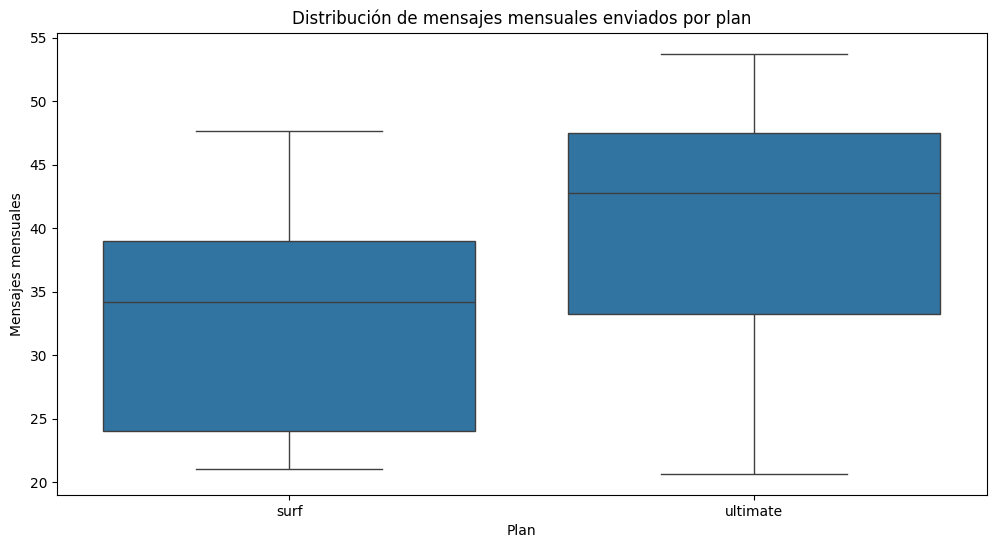

In [193]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan 
mensajes_mensuales_surf = df_todo_con_tarifa.loc[mask_surf, ["month", "user_id", "mensajes_usuario_mes"]]
mensajes_mensuales_ultimate = df_todo_con_tarifa.loc[mask_ultimate, ["month", "user_id", "mensajes_usuario_mes"]]
#display(mensajes_mensuales_surf)

#obtener promedio, varianza, desviacion y grafico de caja o distribucion. 
#estamos comparando los meses no los usuarios individuales.
promedio_mensajes_mensuales_surf = mensajes_mensuales_surf.groupby("month")["mensajes_usuario_mes"].mean().reset_index(name="promedio_mensajes_mensuales")
promedio_mensajes_mensuales_ultimate = mensajes_mensuales_ultimate.groupby("month")["mensajes_usuario_mes"].mean().reset_index(name="promedio_mensajes_mensuales") #para graficar falta unir los marcos

varianza_mensajes_mensuales_surf = promedio_mensajes_mensuales_surf["promedio_mensajes_mensuales"].var()
varianza_mensajes_mensuales_ultimate = promedio_mensajes_mensuales_ultimate["promedio_mensajes_mensuales"].var()

desv_est_mensajes_mensuales_surf = mt.sqrt(varianza_mensajes_mensuales_surf)
desv_est_mensajes_mensuales_ultimate = mt.sqrt(varianza_mensajes_mensuales_ultimate)

print("Varianza para mensajes mensuales del plan surf:", varianza_mensajes_mensuales_surf)
print("Varianza para mensajes mensuales del plan ultimate:", varianza_mensajes_mensuales_ultimate)

print("Desviación estándar para mensajes mensuales del plan surf:", desv_est_mensajes_mensuales_surf)
print("Desviación estándar para mensajes mensuales del plan ultimate:", desv_est_mensajes_mensuales_ultimate)

#Gráfico comparativo de distribucion de mensajes mensuales enviados por plan
promedio_mensajes_mensuales_surf["plan"] = "surf"
promedio_mensajes_mensuales_ultimate["plan"] = "ultimate"
promedio_mensajes_mensuales_ambos_planes = pd.concat([promedio_mensajes_mensuales_surf, promedio_mensajes_mensuales_ultimate])
promedio_mensajes_mensuales_ambos_planes.columns #'month', 'promedio_mensajes_mensuales', 'plan'

plt.figure(figsize=(12, 6))
sns.boxplot(data = promedio_mensajes_mensuales_ambos_planes, x = "plan", y= "promedio_mensajes_mensuales")
plt.title("Distribución de mensajes mensuales enviados por plan")
plt.xlabel("Plan")
plt.ylabel("Mensajes mensuales")
plt.show()


Se mandan menos mensajes mensuales por los usuarios del plan surf que los de ultimate. La mediana está al rededor de 7 mensajes arriba para el plan surf. El rango interquartil es mayor para surf siendo de 15 unidades o mensajes de variacion entre el 50% de los datos centrales mientras que son 13 para ultimate. El rango de mensajes mandados entre usuarios es mayor para el plan surf significando que hay mas variedad en cantidad de uso de mensajes entre los usuarios. 

### Internet

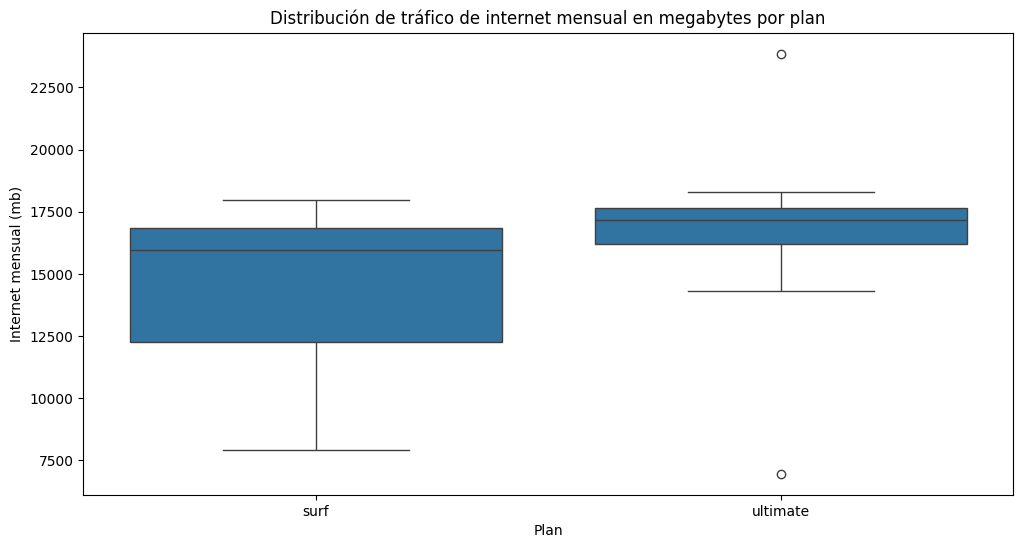

In [194]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan mensual
internet_mensual_surf = df_todo_con_tarifa.loc[mask_surf, ["month", "internet_usuario_mes"]]
internet_mensual_ultimate = df_todo_con_tarifa.loc[mask_ultimate, ["month", "internet_usuario_mes"]]

promedio_internet_mensual_surf = internet_mensual_surf.groupby("month")["internet_usuario_mes"].mean().reset_index(name="promedio_mensual_internet")
promedio_internet_mensual_ultimate = internet_mensual_ultimate.groupby("month")["internet_usuario_mes"].mean().reset_index(name="promedio_mensual_internet")

promedio_internet_mensual_surf["varianza"] = promedio_internet_mensual_surf["promedio_mensual_internet"].var() #varianza siempre es la misma, ya sea que se anexe en el marco de datos o que se use como variable externa al marco de datos. Posteriormente preferiré como dato variable externa. 
promedio_internet_mensual_surf["desv_est"] = np.sqrt(promedio_internet_mensual_surf["varianza"])
promedio_internet_mensual_ultimate["varianza"] = promedio_internet_mensual_surf["promedio_mensual_internet"].var()
promedio_internet_mensual_ultimate["desv_est"] = np.sqrt(promedio_internet_mensual_surf["varianza"])

#Grafico de distribución mensual de tráfico de internet por plan 
promedio_internet_mensual_surf["plan"] = "surf"
promedio_internet_mensual_ultimate["plan"] = "ultimate"
promedio_internet_mensual_ambos_planes = pd.concat([promedio_internet_mensual_surf, promedio_internet_mensual_ultimate])

plt.figure(figsize=(12, 6))
sns.boxplot(data = promedio_internet_mensual_ambos_planes, x = "plan", y= "promedio_mensual_internet")
plt.title("Distribución de tráfico de internet mensual en megabytes por plan")
plt.xlabel("Plan")
plt.ylabel("Internet mensual (mb)")
plt.show()

In [195]:
mediana_internet_surf = promedio_internet_mensual_surf["promedio_mensual_internet"].median()
mediana_internet_ultimate = promedio_internet_mensual_ultimate["promedio_mensual_internet"].median()
print(mediana_internet_surf)
print(mediana_internet_ultimate)
print(mediana_internet_ultimate-mediana_internet_surf)

15951.736041939712
17178.491596638654
1226.7555546989424


El tráfico medio de internet es ligeramente superior para los usuarios ultimate con 17159 mb empleados mientras que la media para el plan surf es de 15933, 1225 mb de diferencia, aproximadamente un gigabyte. 

También es relevante destacar que hay mayor variación entre los datos para el plan surf dado por un rango entre quartiles superior así como un bigote inferior más amplio.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

    month      plan  costo_total_mensual
0       1      surf                20.00
1       1  ultimate               210.00
2       2      surf               119.57
3       2  ultimate               350.00
4       3      surf               616.65
5       3  ultimate               546.00
6       4      surf              1420.70
7       4  ultimate              1169.00
8       5      surf              2695.43
9       5  ultimate              1491.00
10      6      surf              3645.67
11      6  ultimate              2667.00
12      7      surf              5520.77
13      7  ultimate              3402.00
14      8      surf              7671.59
15      8  ultimate              4130.00
16      9      surf              8407.94
17      9  ultimate              5068.00
18     10      surf             11871.67
19     10  ultimate              6349.00
20     11      surf             12481.42
21     11  ultimate              7364.00
22     12      surf             16949.28
23     12  ultim

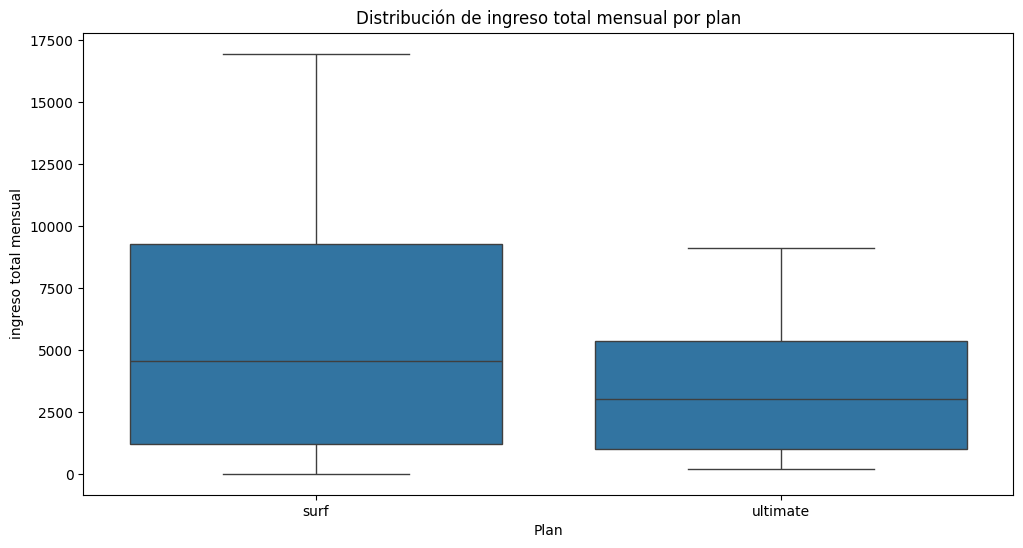

In [196]:
#Obtención de datos sobre los ingresos por plan. 
#Interesa saber cuanto hay de gasto por mes, cual es el gasto promedio por usuario, varianza y desviación estándar así como distribuciones de tanto gastos totales como promedios.

#Gasto total mensual por plan 
df_todo_con_tarifa.columns #'user_id', 'month', 'plan','costo_internet_extra', 'costo_minutos_extra', 'costo_mensajes_extra','costo_total'
#gasto_total_mensual_surf = df_todo_con_tarifa.loc[mask_surf, ["month", "user_id", "plan", "costo_total"]]
#gasto_total_mensual_ultimate = df_todo_con_tarifa.loc[mask_ultimate, ["month", "user_id", "plan", "costo_total"]]

#Ah caray puedo no hacer el mask, y nadamás utilizar el plan como divisor en agrupamiento. 
gasto_total_mensual = df_todo_con_tarifa[["month", "user_id", "plan", "costo_total"]].groupby(["month", "plan"])["costo_total"].sum().reset_index(name="costo_total_mensual") #gasto es ingreso dependiendo de la perspectiva; cliente o empresa respectivamente. 
gasto_total_por_plan = df_todo_con_tarifa[["month", "user_id", "plan", "costo_total"]].groupby("plan")["costo_total"].sum().reset_index(name="Ingresos_totales") #gasto es ingreso dependiendo de la perspectiva; cliente o empresa respectivamente. 

print(gasto_total_mensual)
print("Ingresos totales por plan (anual):", gasto_total_por_plan)
promedio_ingreso_mensual_surf = gasto_total_mensual[gasto_total_mensual["plan"] == "surf"]["costo_total_mensual"].mean() #promedio de la suma de ingresos mensuales, no por usuario.
promedio_ingreso_mensual_ultimate = gasto_total_mensual[gasto_total_mensual["plan"] == "ultimate"]["costo_total_mensual"].mean() 
mediana_ingreso_mensual_surf = gasto_total_mensual[gasto_total_mensual["plan"] == "surf"]["costo_total_mensual"].median()
mediana_ingreso_mensual_ultimate = gasto_total_mensual[gasto_total_mensual["plan"] == "ultimate"]["costo_total_mensual"].median()

print("Promedio y mediana de ingreso mensual surf:",promedio_ingreso_mensual_surf, ";", mediana_ingreso_mensual_surf) #5592 #Promedio de la suma de los costos totales es el promedio de ingresos por mes. 
print("Promedio y mediana ingreso mensual ultimate:",promedio_ingreso_mensual_ultimate, ";", mediana_ingreso_mensual_ultimate) #3477


varianza_ingreso_mensual_surf = gasto_total_mensual[gasto_total_mensual["plan"] == "surf"]["costo_total_mensual"].var()
varianza_ingreso_mensual_ultimate = gasto_total_mensual[gasto_total_mensual["plan"] == "ultimate"]["costo_total_mensual"].var()
desv_est_ingreso_mensual_surf = mt.sqrt(varianza_ingreso_mensual_surf)
desv_est_ingreso_mensual_ultimate = mt.sqrt(varianza_ingreso_mensual_ultimate)
print("Varianza de ingresos mensuales surf:", varianza_ingreso_mensual_surf)
print("Desviación estándar de ingresos mensuales surf:", desv_est_ingreso_mensual_surf)
print("Varianza de ingresos mensuales ultimate:", varianza_ingreso_mensual_ultimate)
print("Desviación estándar de ingresos mensuales ultimate:", desv_est_ingreso_mensual_ultimate)
#Graficar Ingreso promedio.  
plt.figure(figsize=(12, 6))
sns.boxplot(data = gasto_total_mensual, x = "plan", y= "costo_total_mensual")
plt.title("Distribución de ingreso total mensual por plan")
plt.xlabel("Plan")
plt.ylabel("ingreso total mensual")
plt.show()

La mediana del ingreso total mensual para el plan surf es mayor que la del plan ultimate por 1268 dolares. Por otra parte el promedio para surf de ingresos mensuales es de 5593 mientras que el de ultimate es 3477. En ambos sentidos centralmente hay una variación de poco más de 1000 dólares.

El ingreso mensual varía en mayor medida para el plan surf que para el plan ultimate dado por el rango interquartil o caja azul de mayor amplitud. Asimismo observable mediante la estadística de desviación estandar para los datos que es 5228 dólares y 2959 dólares respectivamente. En general hay una mayor ganancia anual por parte del plan surf comparado con el plan ultimate, un 62% más si comparamos los promedios. 

    month      plan  promedio_gasto_total_usuario
0       1      surf                     20.000000
1       1  ultimate                     70.000000
2       2      surf                     23.914000
3       2  ultimate                     70.000000
4       3      surf                     38.540625
5       3  ultimate                     78.000000
6       4      surf                     40.591429
7       4  ultimate                     73.062500
8       5      surf                     50.857170
9       5  ultimate                     71.000000
10      6      surf                     52.081000
11      6  ultimate                     72.081081
12      7      surf                     62.031124
13      7  ultimate                     72.382979
14      8      surf                     64.467143
15      8  ultimate                     72.456140
16      9      surf                     57.196871
17      9  ultimate                     71.380282
18     10      surf                     65.589337


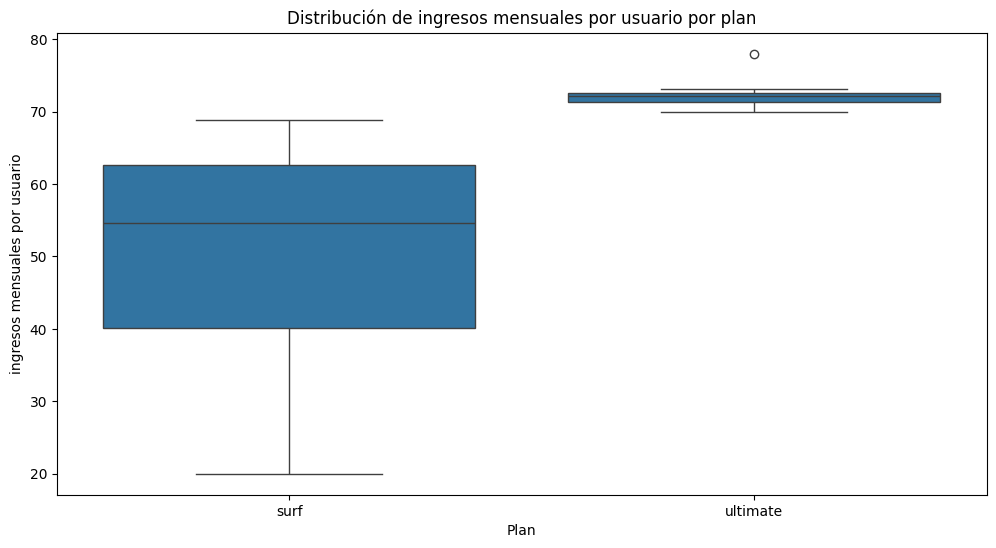

In [197]:
#Diagrama de caja de comparación de gastos promedio mensuales.- Distribución de gastos promedio por usuario mensual. 
gasto_total_mensual_por_usuario = df_todo_con_tarifa[["month", "user_id", "plan", "costo_total"]].groupby(["month", "plan"])["costo_total"].mean().reset_index(name="promedio_gasto_total_usuario") 
print(gasto_total_mensual_por_usuario)
promedio_mensual_surf = gasto_total_mensual_por_usuario[gasto_total_mensual_por_usuario["plan"]=="surf"]["promedio_gasto_total_usuario"].mean() #cuanto gasta el usuario promedio en el plan surf: 47dlls
promedio_mensual_ultimate = gasto_total_mensual_por_usuario[gasto_total_mensual_por_usuario["plan"]=="ultimate"]["promedio_gasto_total_usuario"].mean() #cuanto en el ultimate: 72 dlls

print(promedio_mensual_surf) #47dlls. Este es promedio de la distribucion de valores. Los valores ya son el promedio de gasto por los usuarios al mes. Entonces representa el comportamiento de gasto del usuario promedio por el mes promedio desde una perspectiva anual. 
print(promedio_mensual_ultimate) #72 dlls

varianza_mensual_surf = gasto_total_mensual_por_usuario[gasto_total_mensual_por_usuario["plan"]=="surf"]["promedio_gasto_total_usuario"].var()
mediana_mensual_surf = gasto_total_mensual_por_usuario[gasto_total_mensual_por_usuario["plan"]=="surf"]["promedio_gasto_total_usuario"].median()
desv_est_gasto_mensual_surf = mt.sqrt(varianza_mensual_surf)
varianza_mensual_ultimate = gasto_total_mensual_por_usuario[gasto_total_mensual_por_usuario["plan"]=="ultimate"]["promedio_gasto_total_usuario"].var()
mediana_mensual_ultimate = gasto_total_mensual_por_usuario[gasto_total_mensual_por_usuario["plan"]=="ultimate"]["promedio_gasto_total_usuario"].median()
desv_est_gasto_mensual_ultimate = mt.sqrt(varianza_mensual_ultimate)

print("Mediana, varianza y desviación estándar para gastos o ingresos mensuales por usuario por el plan surf:", mediana_mensual_surf,";", varianza_mensual_surf, ";", desv_est_gasto_mensual_surf )
print("Mediana, varianza y desviación estándar para gastos o ingresos mensuales por usuario por el plan ultimate:", mediana_mensual_ultimate,";", varianza_mensual_ultimate, ";", desv_est_gasto_mensual_ultimate)
#Graficar Ingreso promedio.  
plt.figure(figsize=(12, 6))
sns.boxplot(data = gasto_total_mensual_por_usuario, x = "plan", y= "promedio_gasto_total_usuario")
plt.title("Distribución de ingresos mensuales por usuario por plan")
plt.xlabel("Plan")
plt.ylabel("ingresos mensuales por usuario")
plt.show()

Los ingresos por usuario para el plan ultimate son significativamente mayores ya que no hay solapamiento entre las cajas rango interquartiles y la mediana del plan ultimate es casi 20 dólares mayor que aquella de surf. El rango de los datos o variación para el plan surf es inmenso con una desviación estándar de 14.8 dólares mientras que la de surf es de 1.5 dólares. 

## Prueba las hipótesis estadísticas

Hipótesis a probar: Los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf son diferentes.

In [198]:
# Prueba las hipótesis
#Determinar si se haran unilaterales o bilaterales
#Bilateral. 

#Alternativa: Los ingresos promedio procedentes de los usuarios surf difieren de los ultimate. 
#Nula: Los ingresos promedio procedentes de los usuarios surf no difieren de los ultimate. 

#Datos relevantes a ser comparados. Promedios de ingresos mensuales por usuario. 
gasto_total_mensual_por_usuario
gasto_total_mensual_por_usuario_surf = gasto_total_mensual_por_usuario[gasto_total_mensual_por_usuario["plan"]=="surf"]["promedio_gasto_total_usuario"]
gasto_total_mensual_por_usuario_ultimate = gasto_total_mensual_por_usuario[gasto_total_mensual_por_usuario["plan"]=="ultimate"]["promedio_gasto_total_usuario"]

#Prueba bilateral ttest_ind
alpha = 0.5
resultados = st.ttest_ind(gasto_total_mensual_por_usuario_surf, gasto_total_mensual_por_usuario_ultimate)
#Elección de hipótesis. 
print("Valor p:", resultados.pvalue)

if resultados.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
    print("Es decir: Los ingresos promedio procedentes de los usuarios surf difieren de los ultimate.")
else: 
    print("No rechazamos la hipótesis nula")
    print("Es decir: Los ingresos promedio procedentes de los usuarios surf no difieren de los ultimate.")



Valor p: 0.00010344692020970612
Rechazamos la hipótesis nula
Es decir: Los ingresos promedio procedentes de los usuarios surf difieren de los ultimate.


Hipótesis a probar:
El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

In [199]:
# Prueba las hipótesis

#Nula: Los ingresos promedios de los usuarios del área NY-NJ no difieren significativamente con los de los usuarios para áreas distintas.
#Alternativa: Los ingresos promedios de los usuarios del área NY-NJ difieren significativamente con los de los usuarios para áreas distintas.

#Prueba
#Bilateral. st_ttest_ind()

#Datos a comparar
#Para comparar ciudades se usará la tabla con todos los datos y se le añadirán las ciudades mediante un merge izquierdo por la columna user_id
datos_para_ingresos_por_ciudad = pd.merge(df_todo_con_tarifa, users[["user_id", "city"]], how="left", on="user_id")
ingresos_por_ciudad = datos_para_ingresos_por_ciudad[["month", "plan", "user_id", "city", "costo_total"]].groupby(["month", "plan", "city"])["costo_total"].mean().reset_index(name="promedio_ingresos_ciudad")
display(ingresos_por_ciudad)
print(ingresos_por_ciudad["city"].unique()) #conseguir el nombre para NY-NJ: New York-Newark-Jersey City, NY-NJ-PA MSA
ingresos_por_ciudad_ny_nj = ingresos_por_ciudad[ingresos_por_ciudad["city"]=="New York-Newark-Jersey City, NY-NJ-PA MSA"]["promedio_ingresos_ciudad"]
ingresos_por_ciudad_not_ny_nj = ingresos_por_ciudad[ingresos_por_ciudad["city"]!="New York-Newark-Jersey City, NY-NJ-PA MSA"]["promedio_ingresos_ciudad"]
#son distintos?
print(ingresos_por_ciudad_ny_nj.head()) #definitivamente distintos 
print(ingresos_por_ciudad_not_ny_nj.head())
#Elección de hipótesis
alpha = 0.05
resultados_ingresos_ciudad = st.ttest_ind(ingresos_por_ciudad_ny_nj, ingresos_por_ciudad_not_ny_nj)

print("Valor de P:", resultados_ingresos_ciudad.pvalue)
if resultados_ingresos_ciudad.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
    print("Es decir: Los ingresos promedios de los usuarios del área NY-NJ difieren significativamente con los de los usuarios para áreas distintas.")
else: 
    print("No se rechaza la hipótesis nula")
    print("Es decir: Los ingresos promedios de los usuarios del área NY-NJ no difieren significativamente con los de los usuarios para áreas distintas.") 



,month,plan,city,promedio_ingresos_ciudad
0,1,surf,"Denver-Aurora-Lakewood, CO MSA",20.0
1,1,ultimate,"Charlotte-Concord-Gastonia, NC-SC MSA",70.0
2,1,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA",70.0
3,1,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",70.0
4,2,surf,"Baltimore-Columbia-Towson, MD MSA",20.0
...,...,...,...,...
740,12,ultimate,"St. Louis, MO-IL MSA",70.0
741,12,ultimate,"Tampa-St. Petersburg-Clearwater, FL MSA",70.0
742,12,ultimate,"Tucson, AZ MSA",70.0
743,12,ultimate,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",70.0


['Denver-Aurora-Lakewood, CO MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'San Francisco-Oakland-Berkeley, CA MSA'
 'Baltimore-Columbia-Towson, MD MSA' 'Kansas City, MO-KS MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA'
 'Riverside-San Bernardino-Ontario, CA MSA'
 'Miami-Fort Lauderdale-West Palm Beach, FL MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA'
 'Boston-Cambridge-Newton, MA-NH MSA' 'Fresno, CA MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Seattle-Tacoma-Bellevue, WA MSA' 'Dallas-Fort Worth-Arlington, TX MSA'
 'Austin-Round Rock-Georgetown, TX MSA' 'Cincinnati, OH-KY-IN MSA'
 'Indianapolis-Carmel-Anderson, IN MSA'
 'Louisville/Jefferson County, KY-IN MSA' 'Memphis, TN-MS-AR MSA'
 'Minneapolis-St. Paul-Bloomington, MN-WI MSA'
 'Phoenix-Mesa-Chandler, AZ MSA' 'Portland-Vancouver-Hillsboro, OR-WA MSA'
 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Atlanta-Sandy Springs-Roswell, GA MSA'
 'Chicago-Naperville-Elgin, IL-I

## Conclusión general
A nivel metodológico el proyecto afianza habilidades de importe, revisión de formato de datos, organización, agregación y manipulación de datos con sus respectivas estructuras, adición de cálculos de interés entre ellos  consumo de servicios excedentes y tarifas asociadas de acuerdo a la cantidad de servicios permitidos por los planes para calcular los costos totales a pagar por cada cliente,  revisión de estadística central, realización de pruebas estadísticas y visualización. 

En el transcurso de análisis. Se pudo concretar lo siguiente: 

1. Hay 339 clientes en el plan surf y 161 en el plan ultimate. 

2. El tráfico de llamadas está sesgado hacia los últimos meses. Más del 50% de las llamadas ocurren del mes 10 al 12. El consumo de minutos totales por plan es de 41376 como promedio mensual de surf y 20147 minutos para ultimate. A nivel usuarios, hay un promedio de consumo de minutos por usuario al mes en el plan surf de 385 al igual que 385 para ultimate variando en decimales entre los planes. Como mediana varían minimamente siendo la de surf de 403 y la de ultimate de 412 con una desviación estándar mayor para últimate de 75 minutos y 55 minutos para surf.

3. El consumo medio anual de mensajes por usuario es de 126 mensajes como mediana, 189 como promedio y en un rango de 0 a 1300. Lo cual habla sobre la tendencia en la distribución de usuarios a emplear poco uso de mensajes. Particularmente a nivel mensual se registraron valores medios de 34 y 41 mensajes respectivamente para el plan surf y ultimate.

4. El consumo promedio y mediano anual por usuario de internet por es de 78 gigas y 62 gigas respectivamente. De forma mensual el consumo de mb por usuario para el plan surf es de 15932 contra 17158 por los usuarios ultimate. Una diferencia de medias de poco más de un giga, 1225 mb. 

5. Ingresos. Anualmente se generaron 67115 dólares por el plan surf y 41724 por el plan ultimate. Asimismo mensualmente el promedio de ganancia o ganancia mensual para el plan surf es de 5593 y 3477 dólares por el plan ultimate. Es útil saber que esto representa una ganancia de 62% más por parte del plan surf. La distribución de ingresos por cliente enseña que el cliente promedio surf gasta 51 dlls mientras que el de ultimate 71 dólares. Además el plan surf varía casi 10 veces más con una desviación estándar de 14.8 dólares frente a solo 1.54 dólares por el plan ultimate. 

5. Por último de la distribución para consumo de minutos mensuales se demostró que como promedio solo se llega a al rededor de un máximo de 500 minutos para ambos planes sin embargo ultimate concede 3000 minutos. Una acción interesante con esta información sería ajustar los servicios a los consumos y proporcionar una mejor tarifa como publicidad para atraer clientes al plan con apoyo preferencial. Aunque similar el consumo de minutos por plan tiene una mediana menor por 9 minutos siendo surf consumidor de 403 minutos y ultimate de 412.

